In [21]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [22]:
tickets_data = pd.read_csv("../data/tickets.csv")
tickets_data

,fare_conditions,passenger_id,flight_id,ticket_no,amount,seat_no
0,Economy,0000 000343,116740,5435824372,66600.0,20B
1,Economy,0000 000343,8307,5435824372,66600.0,9A
2,Economy,0000 000343,116740,5435824372,66600.0,9A
3,Economy,0000 000343,8307,5435824372,66600.0,20B
4,Economy,0000 004609,22709,5435912721,11700.0,12K
...,...,...,...,...,...,...
88161,Economy,0033 966862,40591,5434922963,4000.0,20C
88162,Economy,0033 966862,96932,5434922963,7600.0,20F
88163,Economy,0033 966862,133289,5434922963,7600.0,16C
88164,Economy,0033 966862,131868,5434922963,4000.0,20F


In [23]:
tickets_data = pd.read_csv("../data/tickets.csv")
tickets_data = tickets_data.drop_duplicates()
tickets_data = tickets_data.drop_duplicates(
    subset=["flight_id", "seat_no"], keep="last"
).reset_index(drop=True)
tickets_data

,fare_conditions,passenger_id,flight_id,ticket_no,amount,seat_no
0,Economy,0000 000343,116740,5435824372,66600.0,20B
1,Economy,0000 000343,8307,5435824372,66600.0,9A
2,Economy,0000 000343,116740,5435824372,66600.0,9A
3,Economy,0000 000343,8307,5435824372,66600.0,20B
4,Economy,0000 004609,22709,5435912721,11700.0,12K
...,...,...,...,...,...,...
87918,Economy,0033 966862,40591,5434922963,4000.0,20C
87919,Economy,0033 966862,96932,5434922963,7600.0,20F
87920,Economy,0033 966862,133289,5434922963,7600.0,16C
87921,Economy,0033 966862,131868,5434922963,4000.0,20F


In [24]:
tickets_data[
    (tickets_data["flight_id"] == 163870)
    & (tickets_data["seat_no"] == "29B")
]

,fare_conditions,passenger_id,flight_id,ticket_no,amount,seat_no
8001,Economy,0003 167067,163870,5433594133,44300.0,29B


In [25]:
tickets_data.to_csv("../data/tickets.csv", index=False)

In [83]:
passenger_id = tickets_data["passenger_id"]
tickets_data = tickets_data.drop("passenger_id", axis=1)
tickets_data["passpor_ser"] = passenger_id.apply(
    lambda x: x.split(" ")[0].strip(" ")
)
tickets_data["passpor_num"] = passenger_id.apply(
    lambda x: x.split(" ")[-1].strip(" ")
)
tickets_data.head()

,fare_conditions,flight_id,ticket_no,amount,seat_no,passpor_ser,passpor_num
0,Economy,116740,5435824372,66600.0,20B,0000,000343
1,Economy,8307,5435824372,66600.0,9A,0000,000343
2,Economy,116740,5435824372,66600.0,9A,0000,000343
3,Economy,8307,5435824372,66600.0,20B,0000,000343
4,Economy,22709,5435912721,11700.0,12K,0000,004609


In [84]:
fare_cond_data = pd.read_csv("../data/results/fare_condition.csv")

In [85]:
tickets_data["fare_conditions"] = tickets_data["fare_conditions"].apply(
    lambda x: fare_cond_data[fare_cond_data["fare_conditions"] == x][
        "id"
    ].iloc[0]
)

(array([2.9000e+01, 3.9700e+02, 2.8030e+03, 1.0860e+04, 2.3377e+04,
        3.7395e+04, 1.1002e+04, 2.8560e+03, 3.7600e+02, 2.7000e+01]),
 array([-1. ,  1.2,  3.4,  5.6,  7.8, 10. , 12.2, 14.4, 16.6, 18.8, 21. ]),
 <BarContainer object of 10 artists>)

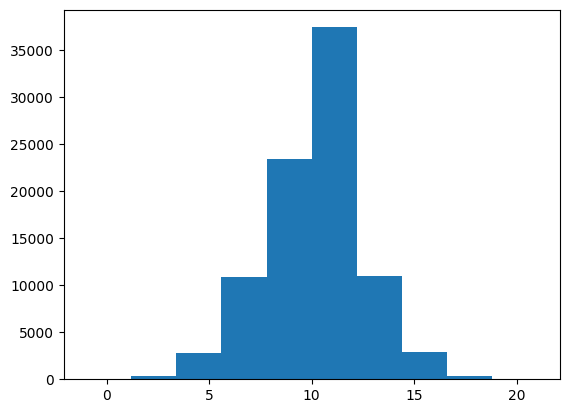

In [86]:
np.random.seed(42)
baggage_weight = np.round(np.random.normal(10, 2.5, len(tickets_data)))
plt.hist(x=baggage_weight)

In [87]:
is_registred_distrb = np.random.binomial(
    n=1, p=0.9, size=len(tickets_data)
)

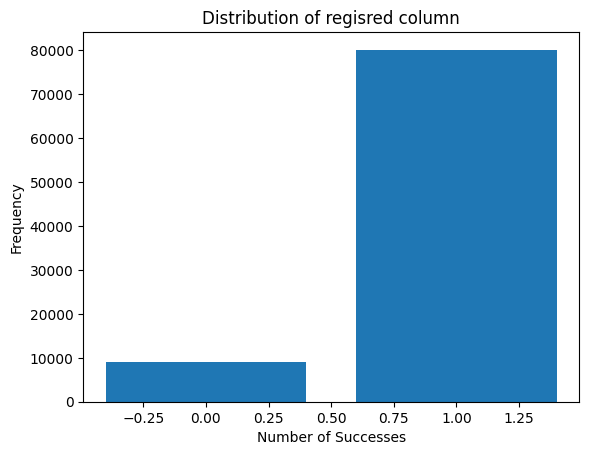

In [88]:
plt.hist(is_registred_distrb, bins=range(1 + 2), align="left", rwidth=0.8)
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Distribution of regisred column")
plt.show()

In [89]:
tickets_data["baggage"] = baggage_weight
tickets_data["is_regisred"] = is_registred_distrb.astype(bool)

In [90]:
Path.mkdir(Path("../data/results"), exist_ok=True)
tickets_data.to_csv("../data/results/tickets.csv", index=False)

In [5]:
tickets_data = pd.read_csv("../data/normalized/tickets.csv")
flight_data = pd.read_csv("../data/normalized/flights.csv")

In [8]:
tickets_data

,fare_conditions,passenger_id,flight_id,ticket_no,amount,seat_no
0,Economy,0000 000343,116740,5435824372,66600.0,20B
1,Economy,0000 000343,8307,5435824372,66600.0,9A
2,Economy,0000 000343,116740,5435824372,66600.0,9A
3,Economy,0000 000343,8307,5435824372,66600.0,20B
4,Economy,0000 004609,22709,5435912721,11700.0,12K
...,...,...,...,...,...,...
88161,Economy,0033 966862,40591,5434922963,4000.0,20C
88162,Economy,0033 966862,96932,5434922963,7600.0,20F
88163,Economy,0033 966862,133289,5434922963,7600.0,16C
88164,Economy,0033 966862,131868,5434922963,4000.0,20F
